In [1]:
from patchedimage import PatchedImage
from utilities import *

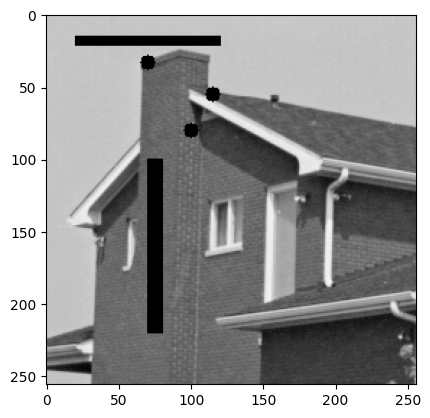

In [113]:
imgp = PatchedImage("images/maison.tif",6)
masque = masque_carre((15,20),(21,120),imgp.img.shape)+masque_circulaire((33,70),5,imgp.img.shape)+masque_circulaire((55,115),5,imgp.img.shape)+masque_circulaire((80,100),5,imgp.img.shape)+masque_carre((100,70),(220,80),imgp.img.shape)
imgp.set_masque(masque,leaf_size=128)#+masque_circulaire((20,50),15,imgp.img.shape))
imgp.set_priorities()
imgp.show_img()

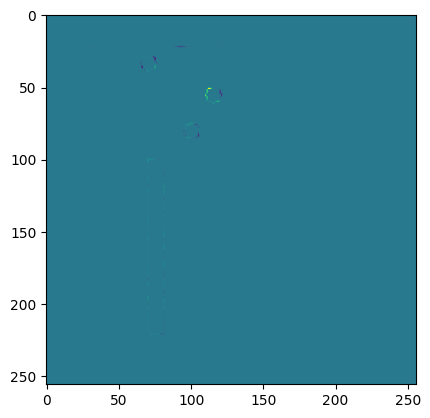

In [114]:
plt.imshow(imgp.priority)

In [117]:
for i in range(100):
    try:
        i,j = imgp.find_max_priority()
    except ValueError:
        break
    imgp.reconstruction((i,j))
    imgp.set_priorities()

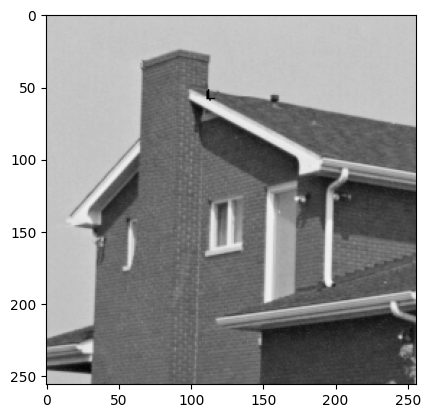

In [118]:
imgp.show_img()